# Data Visualization for a Social Media Audit
---

In August 2020 I flew to New York, moved into a tiny hobit-hole of a bedroom, and immediately started my two-week COVID quarantine. To keep myself entertained, I started learning Python. I decided to use Seaborn instead of Excel to visualize social media data for a marketing strategy client.

What I did:
- Installed and updated packages using Anaconda
- Set up my Jupyter notebook with Pandas, Matplotlib, Numpy, Seaborn, and Textstat
- Anonymized client data before sharing this notebook
- Formatted my data to analyze when posts were published
- Formatted my data to analyze reading level in English and Spanish
- Explored different graph types using Seaborn

In this notebook:
- Basic setup things
- Poking around to make sure the CSV looks right
- Understanding what the client has been posting on Facebook
- Graphing how different variables might impact reach and engagement

Not in this notebook: 
- Any meaningful statistical analysis whatsoever. That's a separate project!

## Basic setup things
---

In [200]:
import pandas as pd

In [201]:
import matplotlib.pyplot as plt 

In [202]:
import numpy as np

In [203]:
# moved to new conda environment; had to downgrade from 1.23.0 so this would play nice with scipy (in the terminal, used conda install -c conda-forge numpy=1.22.0)

np.version.version

'1.22.0'

In [204]:
from pandas import DataFrame

In [205]:
from datetime import datetime

In [206]:
# ended up not using this
from scipy import stats

In [207]:
# ended up not using this
from sklearn import preprocessing
from sklearn.model_selection import KFold
from sklearn import preprocessing, svm 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression 
from sklearn import metrics

In [208]:
import seaborn as sns 

In [209]:
%matplotlib inline

In [ ]:
#before posting to GitHub, I did a quick find/replace to anonymize client data before publishing:
    #text = open("GOFBP.csv", "r")
    #text = ''.join([i for i in text]) \
    #    .replace("actual client name", "CLIENT")
    #x = open("GOFBP2.csv","w")
    #x.writelines(text)
    #x.close()

In [314]:
from textstat.textstat import textstat



## Poking around to make sure my dataframe looks right
---

In [210]:
df = pd.read_csv("GOFBP2.csv")

df.shape

(999, 19)

In [211]:
df.dtypes

SITE                          object
LENGTH                       float64
Blank                        float64
Bilingual                    float64
Spanish                      float64
Language                      object
Published                     object
Post                          object
Type                          object
Targeting                     object
Reach                        float64
Organic Reach                float64
Paid Reach                   float64
Organic:paid                 float64
Post Clicks                  float64
Reactions Comments Shares    float64
Engagement                   float64
Engagment:Reach               object
Unnamed: 18                  float64
dtype: object

In [212]:
df.head(5)

,SITE,LENGTH,Blank,Bilingual,Spanish,Language,Published,Post,Type,Targeting,Reach,Organic Reach,Paid Reach,Organic:paid,Post Clicks,Reactions Comments Shares,Engagement,Engagment:Reach,Unnamed: 18
0,FRESNO,46.0,0.0,0.0,0.0,English,1/9/20 18:19,CLIENT Fresno updated their status.,Status,Public,7.0,7.0,0.0,NaN,0.0,0.0,0.0,0.00,NaN
1,FRESNO,57.0,0.0,0.0,1.0,Spanish,2/25/20 1:38,"Platicas y Experiencias Speaker Series: Miguel Vega, LCAP",Photo,Public,24.0,24.0,0.0,NaN,0.0,0.0,0.0,0.00,NaN
2,FRESNO,151.0,0.0,0.0,1.0,Spanish,8/21/20 12:04,21 de agosto 2020- Actualizaciones sobre la pandemia en Fresno. https://www.facebook.com/100050284268909/videos/166204751732333/?extid=4KxUXSYZXOGLKHEz,Shared Video,Public,32.0,32.0,0.0,NaN,0.0,0.0,0.0,0.00,NaN
3,FRESNO,31.0,0.0,0.0,0.0,English,7/8/20 19:19,DACA - Foro Informativo Virtual,Link,Public,39.0,39.0,0.0,NaN,0.0,0.0,0.0,0.00,NaN
4,FRESNO,130.0,0.0,0.0,0.0,English,5/6/20 17:51,Teacher Appreciation Week Day 3 Teacher: Katie Maiorno School: Washington Union High School #thankaFresnoteacher #SendTeachersLove,Photo,Public,76.0,76.0,0.0,NaN,0.0,0.0,0.0,0.00,NaN


In [213]:
# Check encoding in case I need to update later

with open('GOFBP2.csv') as f:
    print(f)

<_io.TextIOWrapper name='GOFBP2.csv' mode='r' encoding='UTF-8'>



# What kind of content is this client posting?
---

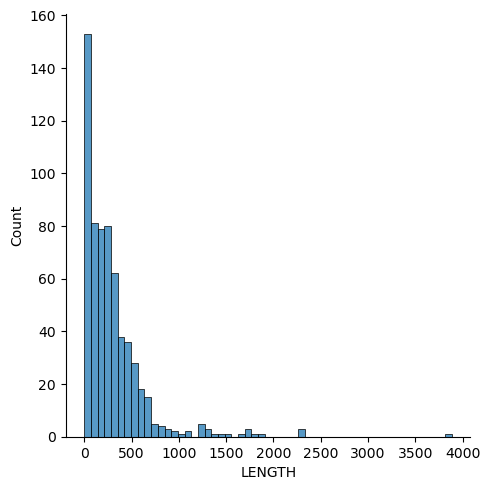

In [214]:
# How long are their social media posts?

x = df['LENGTH']
sns.displot(x);

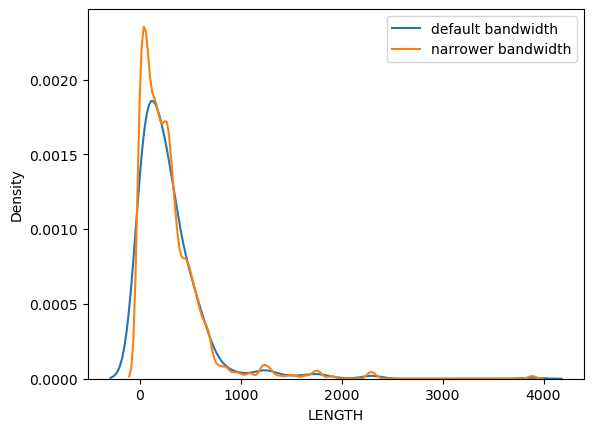

In [215]:
# same graph, but curvy and Gaussian!

sns.kdeplot(x, label="default bandwidth");
sns.kdeplot(x, bw_method=.1, label="narrower bandwidth")
plt.legend();

array([[<AxesSubplot: title={'center': 'Published'}>]], dtype=object)

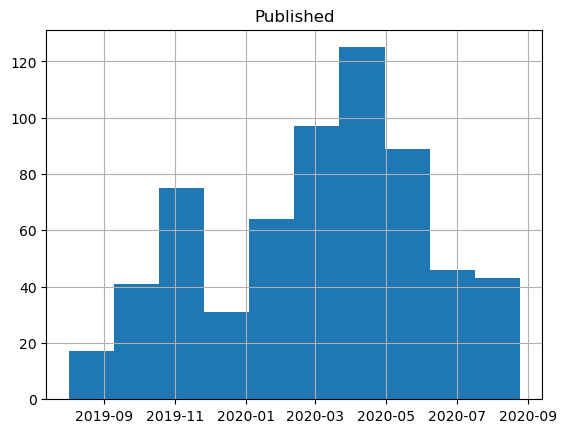

In [321]:
# How consistently are they posting? 

#(first, change column to datetime format)
df['Published'] = pd.to_datetime(df['Published'])
df.hist('Published')

/Users/margaretduff/opt/anaconda3/envs/grocerylist/lib/python3.10/site-packages/seaborn/axisgrid.py:38: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set(**kwargs)


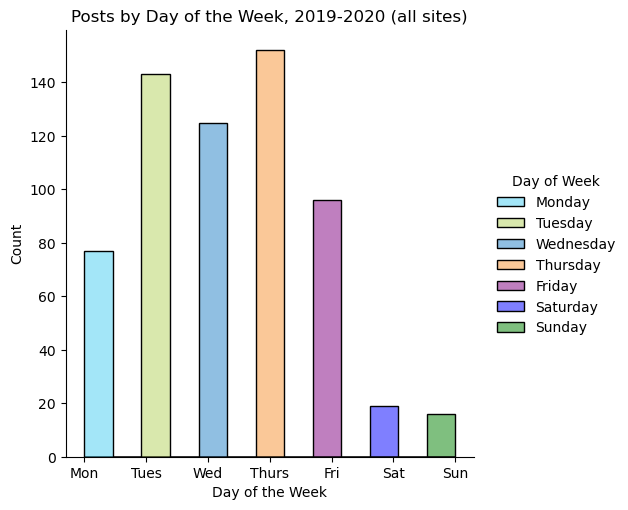

In [312]:
# Which days of the week are they posting? 

#(first, add a "Day of Week" column to the dataframe)
df['Published'] = pd.to_datetime(df['Published'])
df['Day of Week'] = df['Published'].dt.day_name()
datetime_series = pd.to_datetime(df['Published'])
df['Year'] = datetime_series.dt.year

# tried and scrapped the following approach to get a weekday number:
    #bob = pd.to_datetime(df['Published'])
    #df['Weekday Number'] = bob.dt.dayofweek
    #df.hist('Weekday Number')
    
# this worked better:
df.loc[df['Day of Week'] == 'Monday', 'Day of Week Number'] = 1 
df.loc[df['Day of Week'] == 'Tuesday', 'Day of Week Number'] = 2 
df.loc[df['Day of Week'] == 'Wednesday', 'Day of Week Number'] = 3
df.loc[df['Day of Week'] == 'Thursday', 'Day of Week Number'] = 4 
df.loc[df['Day of Week'] == 'Friday', 'Day of Week Number'] = 5
df.loc[df['Day of Week'] == 'Saturday', 'Day of Week Number'] = 6 
df.loc[df['Day of Week'] == 'Sunday', 'Day of Week Number'] = 7 

#One way to graph this (in the client's color palate, of course)
ax = sns.displot(data=df, x="Day of Week Number", hue_order=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'], hue="Day of Week", palette=["#49CEF2", "#b5d35c", "#2280c7", "#f69333", "purple", "blue", "green"])
ax.set(title='Posts by Day of the Week, 2019-2020 (all sites)', xlabel='Day of the Week', ylabel='Count', xticklabels=["", "Mon", "Tues", "Wed", "Thurs", "Fri", "Sat", "Sun"])
plt.show()

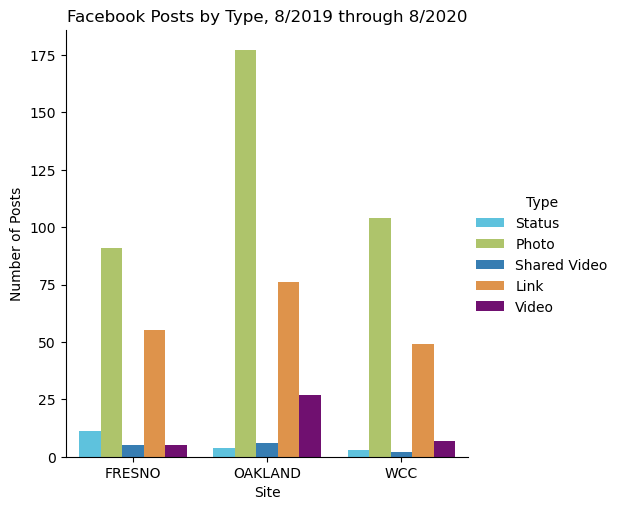

In [323]:
# What post types are they posting?

ax = sns.catplot(x="SITE", kind="count", hue="Type", palette=["#49CEF2", "#b5d35c", "#2280c7", "#f69333", "purple"], data=df);
ax.set(title='Facebook Posts by Type, 8/2019 through 8/2020', xlabel='Site', ylabel='Number of Posts')
plt.show()

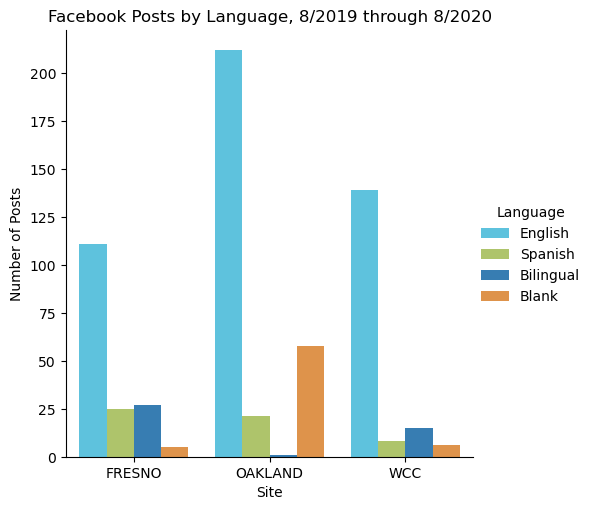

In [322]:
# Which languages are they posting in?

ax = sns.catplot(x="SITE", kind="count", hue="Language", palette=["#49CEF2", "#b5d35c", "#2280c7", "#f69333"], data=df);
ax.set(title='Facebook Posts by Language, 8/2019 through 8/2020', xlabel='Site', ylabel='Number of Posts')
plt.show()

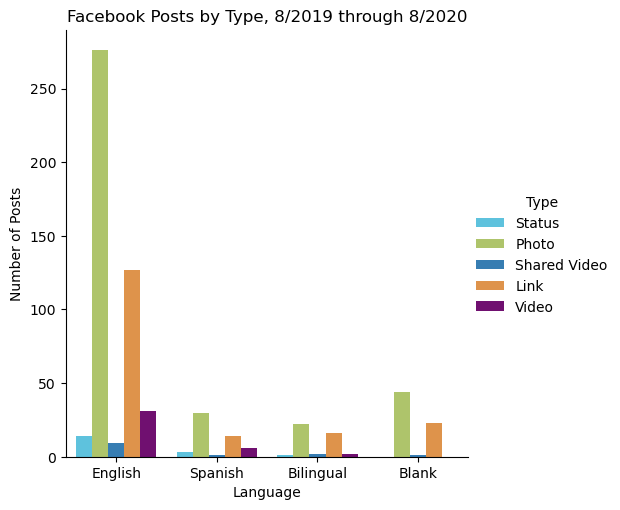

In [324]:
# What's being posted in each language?

ax = sns.catplot(x="Language", kind="count", hue="Type", palette=["#49CEF2", "#b5d35c", "#2280c7", "#f69333", "purple"], data=df);
ax.set(title='Facebook Posts by Type, 8/2019 through 8/2020', xlabel='Language', ylabel='Number of Posts')
plt.show()

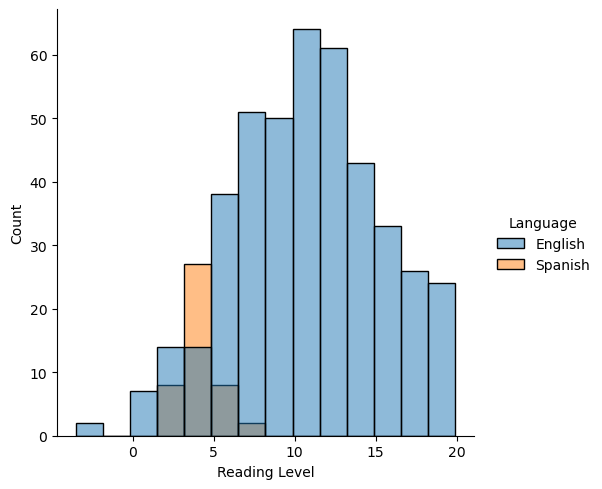

In [326]:
# How hard are their posts to read (in English and Spanish)?

# Change post from object to string
df['Post'] = df['Post'].astype('string')

# Make sure full post text is showing instead of getting truncated
pd.set_option("display.max_colwidth", None)

# Make sure Posts are actually strings
df['Post']=df['Post'].apply(str)

# add a column to the dataframe for reading level
df['Reading Level English'] = df['Post'].apply(textstat.flesch_kincaid_grade)
df['Reading Level Spanish'] = df['Post'].apply(textstat.crawford)
df.loc[df['Language'] == 'English', 'Reading Level'] = df['Reading Level English'] 
df.loc[df['Language'] == 'Spanish', 'Reading Level'] = df['Reading Level Spanish']
df.loc[df['Language'] == 'Bilingual', 'Reading Level'] = "0"
df.loc[df['Language'] == 'Blank', 'Reading Level'] = "0"

# filter data to get rid of outliers (some posts were miscategorized as the wrong language)
options = ['English', 'Spanish'] 
dfEngSpan = df[df['Language'].isin(options)] 
dfEngSpan = dfEngSpan[dfEngSpan['Reading Level English'] <=20]
    
sns.displot(data=dfEngSpan, x="Reading Level", hue='Language')

In [264]:
# What is the average reading level (grade) for English-language posts?

dfEnglish = df[df['Language']=='English']

#kick out outliers since at least some are miscategorized Spanish posts
dfEnglishNoOutliers = dfEnglish[dfEnglish['Reading Level English'] <=20]
dfEnglishNoOutliers['Reading Level'].mean()

10.830444964871203

In [292]:
# What is the average reading level (grade) for Spanish-language posts? 

dfSpanish = df[df['Language']=='Spanish']
dfSpanishNoOutliers = dfEnglish[dfEnglish['Reading Level Spanish'] <=30]
dfSpanishNoOutliers['Reading Level Spanish'].mean()

3.590631808278867


# How well does their content perform?
---

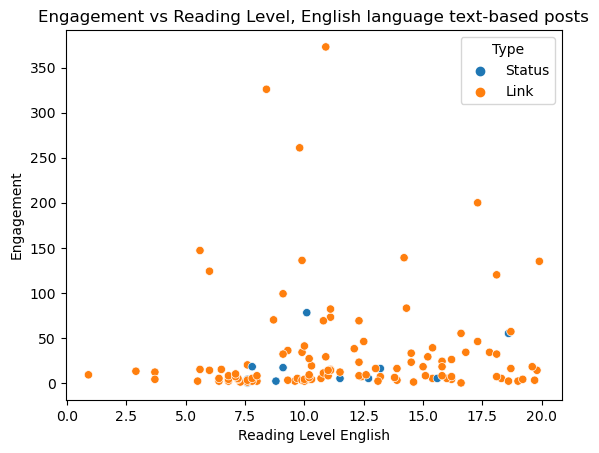

In [335]:
# Does reading level seem to impact post performance? 

options = ['Status', 'Link'] 
dfEngStatus = dfEnglishNoOutliers[dfEnglishNoOutliers['Type'].isin(options)] 

ax = sns.scatterplot(x="Reading Level English", y="Engagement", hue="Type", data=dfEngStatus,); 
ax.set(title='Engagement vs Reading Level, English language text-based posts')
plt.show()

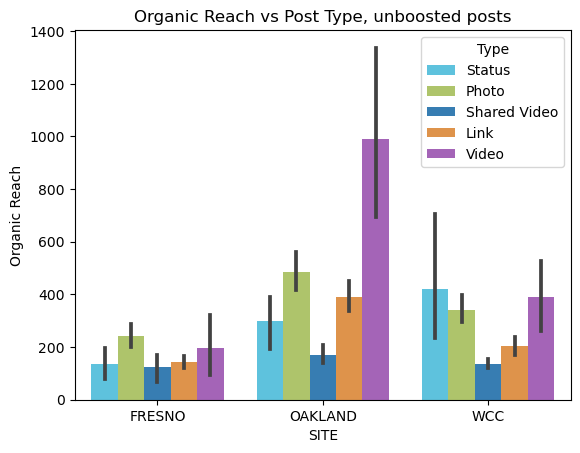

In [88]:
# Is there a relationship between post type and reach?

df = pd.read_csv("GOFBP2.csv")
dfnoads = df[df['Paid Reach']==0]
dfnot = dfnoads[dfnoads['Reach']!=35200]
dfnoe = dfnot[dfnot['Engagement']!=1870]
ax = sns.barplot(x="SITE", y="Organic Reach", hue="Type", palette=["#49CEF2", "#b5d35c", "#2280c7", "#f69333", "#AB56C5"], data=dfnoe,); 
ax.set(title='Organic Reach vs Post Type, unboosted posts')
plt.show()

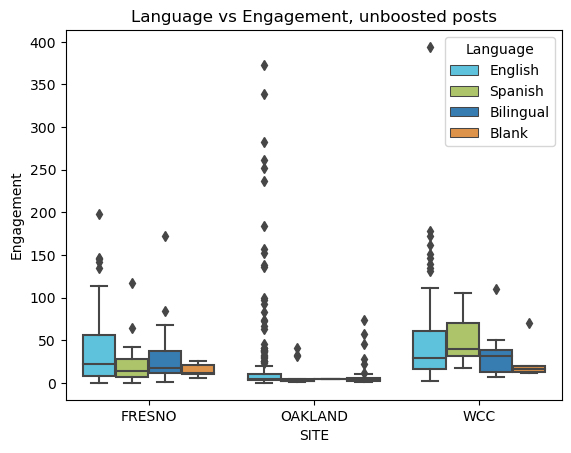

In [328]:
# Is there a relationship between language and engagement?

dfnoads = df[df['Paid Reach']==0]
dfno35200 = dfnoads[dfnoads['Engagement'] <=700]
ax = sns.boxplot(x="SITE", y="Engagement", hue="Language", palette=["#49CEF2", "#b5d35c", "#2280c7", "#f69333"], data=dfno35200,); 
ax.set(title='Language vs Engagement, unboosted posts')
plt.show()

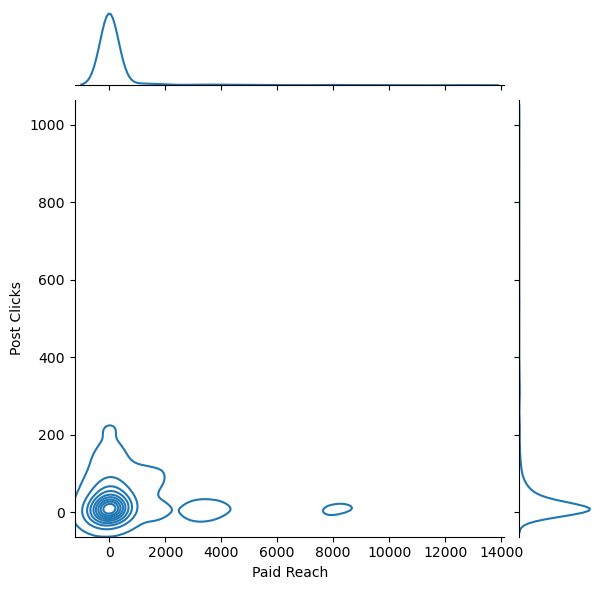

In [334]:
# For paid ads, are extra eyeballs translating into extra engagement?

sns.jointplot(x="Paid Reach", y="Post Clicks", data=df, kind="kde");